In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from sklearn.utils import class_weight
import numpy as np
from PIL import Image

image_directory = './data/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=20.0,
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    image_directory,
    target_size=(224, 224),
    batch_size=2,
    class_mode='categorical',
    subset='training',
    # batch_size=1
)

validation_generator = validation_datagen.flow_from_directory(
    image_directory,
    target_size=(224, 224),
    batch_size=2,
    class_mode='categorical',
    subset='validation',
    # batch_size=1
)

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)



Found 11630 images belonging to 3 classes.
Found 2906 images belonging to 3 classes.
Class Weights: {0: 0.9691666666666666, 1: 1.0116562282533055, 2: 1.0207126557837458}


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array # type: ignore
import numpy as np
import requests
from io import BytesIO
from PIL import Image
from tensorflow.keras.models import load_model # type: ignore

model = load_model('./training/vgg16/vgg16_intermediate7.h5')

img_url = ['https://imgs.search.brave.com/EtbUs9eQBxXmI57ays5oLBYWWCluJXhDjyvSF_rIEHA/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5nZXR0eWltYWdl/cy5jb20vaWQvMTI3/ODEzOTU2OC9waG90/by9zdHVkaW8tcG9y/dHJhaXQtb2YtMjAt/eWVhci1vbGQtd29t/YW4uanBnP3M9NjEy/eDYxMiZ3PTAmaz0y/MCZjPUZTRWRYNkVH/S3JqYkN2T0prOWlk/aVlaSm9TRXJBOWJ3/aXpIRWtXODZBM2M9',
           'https://imgs.search.brave.com/A-DpXlEKQmNpOJaSx87nHSnbvRW7aHicQinxaMfS-i8/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5nZXR0eWltYWdl/cy5jb20vaWQvMTI2/MzA4ODk4NS9waG90/by93b21hbi13ZWFy/aW5nLXN1cmdpY2Fs/LW1hc2stYW5kLXNt/aWxpbmcuanBnP3M9/NjEyeDYxMiZ3PTAm/az0yMCZjPThydGhL/ZEVqazNEWWRMZGVr/dlRza1JRejNPZFJP/SHBGWENzWElPLTV2/MjQ9',
           'https://images.ctfassets.net/1ny4yoiyrqia/3Sk1bzqC52xPwk1lbXSVxs/516bc9fc458271eb0fcf37e5161c2155/prevent-face-mask-problems-ear-soreness.png?fm=webp&w=450&h=450',
           'https://imgs.search.brave.com/xXaZnYkX7XOV5KbLpqRa1yfxtl0x4te2hK_EXXKR7Z0/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9pbWFn/ZXMuY3RmYXNzZXRz/Lm5ldC9jbnUwbThy/ZTFleGUvM0hZVGJq/bHhsNmI5Qms5QVRK/MlAxTC9kODQ3ZGZj/YzRiOTBiNzU4NDc1/NTNmNGJlOTE2YjQy/MS9zaHV0dGVyc3Rv/Y2tfMTcwNDQ2NTAx/MC5qcGc_Zm09anBn/JmZsPXByb2dyZXNz/aXZlJnc9NjYwJmg9/NDMzJmZpdD1maWxs',
           'https://imgs.search.brave.com/zFDj4_bP2jdczeFquWyHL7e-Z5hD__jq7LQIw5gkWEw/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5nZXR0eWltYWdl/cy5jb20vaWQvMTI1/MjQ3MzU4OS9waG90/by95b3VuZy13b21h/bi13ZWFyaW5nLXN1/cmdpY2FsLW1hc2st/aW4tZnJvbnQtb2Yt/aG9tZS5qcGc_cz02/MTJ4NjEyJnc9MCZr/PTIwJmM9NjA0cGxM/T2x4bkJ6RXFKbXNI/NC1zY0JXckx4WG1x/dWY1ZlVEWVZycmwt/dz0']

for i in img_url:
    response = requests.get(i)
    img = Image.open(BytesIO(response.content)).resize((224, 224))

    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)

    print("Predicted class probabilities:", predictions)

    predicted_class = np.argmax(predictions, axis=1)
    print("Predicted class:", predicted_class)

    class_indices = train_generator.class_indices
    print("Class indices (label names):", class_indices)

    index_to_class = {v: k for k, v in class_indices.items()}

    predicted_class_name = index_to_class[predicted_class[0]]
    print("Predicted class name:", predicted_class_name,'\n')

c:\Users\Shaunak\anaconda3\envs\py310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1/1 [==============================] - 18s 18s/step
Predicted class probabilities: [[1.2244332e-04 2.6570824e-06 9.9987483e-01]]
Predicted class: [2]


NameError: name 'train_generator' is not defined

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16 # type: ignore
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg16_base.layers:
    layer.trainable = False

model = models.Sequential()
model.add(vgg16_base)

model = models.Sequential()
model.add(vgg16_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               3211392   
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 17,926,467
Trainable params: 3,211,779
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[early_stop],
    class_weight = class_weights,
    batch_size=4
)

for layer in vgg16_base.layers:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_fine_tune = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[early_stop],
    class_weight = class_weights,
    batch_size=4
)

model.save('vgg16_custom_trained_NEW1.h5')

Epoch 1/5
5815/5815 [==============================] - 393s 67ms/step - loss: 0.1233 - accuracy: 0.9583 - val_loss: 1.1697 - val_accuracy: 0.7412
Epoch 2/5
5815/5815 [==============================] - 1567s 269ms/step - loss: 0.1143 - accuracy: 0.9622 - val_loss: 1.1851 - val_accuracy: 0.7374
Epoch 3/5
5815/5815 [==============================] - 267s 46ms/step - loss: 0.1068 - accuracy: 0.9641 - val_loss: 1.0683 - val_accuracy: 0.7663
Epoch 4/5
5815/5815 [==============================] - 260s 45ms/step - loss: 0.1039 - accuracy: 0.9654 - val_loss: 0.8145 - val_accuracy: 0.7608
Epoch 5/5
5815/5815 [==============================] - 264s 45ms/step - loss: 0.1041 - accuracy: 0.9661 - val_loss: 1.6752 - val_accuracy: 0.6734
Epoch 1/5
5815/5815 [==============================] - 466s 80ms/step - loss: 0.0992 - accuracy: 0.9683 - val_loss: 0.4412 - val_accuracy: 0.8513
Epoch 2/5
5815/5815 [==============================] - 458s 79ms/step - loss: 0.0609 - accuracy: 0.9801 - val_loss: 0.5887

In [9]:
history_fine_tune = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[early_stop],
    class_weight=class_weights,
    batch_size=4
)

model.save('vgg16_custom_trained_NEW2.h5')

Epoch 1/5
5815/5815 [==============================] - 447s 77ms/step - loss: 0.0369 - accuracy: 0.9875 - val_loss: 1.8914 - val_accuracy: 0.8190
Epoch 2/5
5815/5815 [==============================] - 445s 77ms/step - loss: 0.0376 - accuracy: 0.9891 - val_loss: 0.5873 - val_accuracy: 0.8713
Epoch 3/5
5815/5815 [==============================] - 457s 79ms/step - loss: 0.0336 - accuracy: 0.9892 - val_loss: 0.4848 - val_accuracy: 0.8544
Epoch 4/5
5815/5815 [==============================] - 449s 77ms/step - loss: 0.0300 - accuracy: 0.9901 - val_loss: 0.8329 - val_accuracy: 0.8142
Epoch 5/5
5815/5815 [==============================] - 449s 77ms/step - loss: 0.0278 - accuracy: 0.9914 - val_loss: 0.8672 - val_accuracy: 0.8376


In [11]:
from tensorflow.keras.applications import VGG19 # type: ignore
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
import tensorflow as tf

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = models.Sequential()
model.add(vgg19_base)

model = models.Sequential()
model.add(vgg19_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

for layer in vgg19_base.layers:
    layer.trainable = False

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               3211392   
                                                                 
 dense_9 (Dense)             (None, 3)                 387       
                                                                 
Total params: 23,236,163
Trainable params: 3,211,779
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_fine_tune = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[early_stop],
    class_weight = class_weights,
    batch_size=1
)

for layer in vgg19_base.layers:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[early_stop],
    batch_size=1
)

model.save('vgg19_custom_trained.h5')

Epoch 1/5
5815/5815 [==============================] - 265s 45ms/step - loss: 0.3275 - accuracy: 0.8837 - val_loss: 0.7727 - val_accuracy: 0.7684
Epoch 2/5
5815/5815 [==============================] - 260s 45ms/step - loss: 0.2132 - accuracy: 0.9255 - val_loss: 0.9662 - val_accuracy: 0.7519
Epoch 3/5
5815/5815 [==============================] - 262s 45ms/step - loss: 0.1899 - accuracy: 0.9342 - val_loss: 1.0876 - val_accuracy: 0.7454
Epoch 4/5
5815/5815 [==============================] - 270s 47ms/step - loss: 0.1708 - accuracy: 0.9396 - val_loss: 0.9743 - val_accuracy: 0.7347
Epoch 5/5
5815/5815 [==============================] - 264s 45ms/step - loss: 0.1619 - accuracy: 0.9435 - val_loss: 1.0508 - val_accuracy: 0.7244
Epoch 1/5
5815/5815 [==============================] - 558s 96ms/step - loss: 0.1023 - accuracy: 0.9663 - val_loss: 0.4092 - val_accuracy: 0.8252
Epoch 2/5
5815/5815 [==============================] - 554s 95ms/step - loss: 0.0618 - accuracy: 0.9801 - val_loss: 0.6032 -

In [ ]:
from tensorflow.keras.models import load_model # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Load the pre-trained model
model = load_model('./Final_models/vgg19_custom_trained.h5')

# Fit the model with the generator
history_fine_tune = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[early_stop],
    class_weight=class_weights
)

# Save the updated model
model.save('vgg19_custom_trained_NEW2.h5')


Epoch 1/5
3064/5815 [==============>...............] - ETA: 4:22 - loss: 0.0359 - accuracy: 0.9892

c:\Users\Shaunak\anaconda3\envs\py310\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5815/5815 [==============================] - 585s 99ms/step - loss: 0.0374 - accuracy: 0.9887 - val_loss: 0.5664 - val_accuracy: 0.8589
Epoch 2/5
5815/5815 [==============================] - 910s 156ms/step - loss: 0.0361 - accuracy: 0.9882 - val_loss: 0.3701 - val_accuracy: 0.9067
Epoch 3/5
5815/5815 [==============================] - 773s 133ms/step - loss: 0.0325 - accuracy: 0.9893 - val_loss: 0.9545 - val_accuracy: 0.8503
Epoch 4/5
5815/5815 [==============================] - 543s 93ms/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.7033 - val_accuracy: 0.8637
Epoch 5/5
5815/5815 [==============================] - 580s 100ms/step - loss: 0.0292 - accuracy: 0.9900 - val_loss: 2.1027 - val_accuracy: 0.7485


RESNET TRAINING

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50 # type: ignore
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

for layer in base_model.layers:
    layer.trainable = False

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               12845184  
                                                                 
 dense_7 (Dense)             (None, 3)                 387       
                                                                 
Total params: 36,433,283
Trainable params: 12,845,571
Non-trainable params: 23,587,712
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[early_stop]
)

for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_fine_tune = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[early_stop]
)

model.save('resnet50_custom_trained.h5')

Epoch 1/5
3932/5815 [===================>..........] - ETA: 12:23 - loss: 1.1472 - accuracy: 0.3244

c:\Users\Shaunak\anaconda3\envs\py310\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5815/5815 [==============================] - 1659s 285ms/step - loss: 1.1315 - accuracy: 0.3271 - val_loss: 1.0985 - val_accuracy: 0.3445
Epoch 2/5
5815/5815 [==============================] - 246s 42ms/step - loss: 1.1093 - accuracy: 0.3334 - val_loss: 1.0991 - val_accuracy: 0.3266
Epoch 3/5
5815/5815 [==============================] - 256s 44ms/step - loss: 1.0990 - accuracy: 0.3322 - val_loss: 1.0984 - val_accuracy: 0.3441
Epoch 4/5
5815/5815 [==============================] - 262s 45ms/step - loss: 1.0990 - accuracy: 0.3288 - val_loss: 1.0992 - val_accuracy: 0.3293
Epoch 5/5
5815/5815 [==============================] - 262s 45ms/step - loss: 1.0991 - accuracy: 0.3229 - val_loss: 1.0986 - val_accuracy: 0.3290
Epoch 1/5
5815/5815 [==============================] - 398s 67ms/step - loss: 0.1647 - accuracy: 0.9420 - val_loss: 0.5304 - val_accuracy: 0.8496
Epoch 2/5
5815/5815 [==============================] - 339s 58ms/step - loss: 0.0597 - accuracy: 0.9813 - val_loss: 0.9141 - val_acc

In [ ]:
from tensorflow.keras.models import load_model # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model = load_model('./resnet_custom_trained_NEW4.h5')

history_fine_tune = model.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator,
    callbacks=[early_stop],
    class_weight=class_weights
)

model.save('resnet_custom_trained_NEW5.h5')

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from sklearn.utils import class_weight
import numpy as np

image_directory = './data/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=20.0,
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    image_directory,
    target_size=(299, 299),
    batch_size=1,
    class_mode='categorical',
    subset='training',
)

validation_generator = validation_datagen.flow_from_directory(
    image_directory,
    target_size=(299, 299),
    batch_size=1,
    class_mode='categorical',
    subset='validation',
)

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

c:\Users\Shaunak\anaconda3\envs\py310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 11630 images belonging to 3 classes.
Found 2906 images belonging to 3 classes.
Class Weights: {0: 0.9691666666666666, 1: 1.0116562282533055, 2: 1.0207126557837458}


Inception Training

In [2]:
from tensorflow.keras.applications import InceptionV3 # type: ignore
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

inceptionv3_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

model = models.Sequential()
model.add(inceptionv3_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

for layer in inceptionv3_base.layers:
    layer.trainable = False

model.summary()

c:\Users\Shaunak\anaconda3\envs\py310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 128)               16777344  
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 38,580,515
Trainable params: 16,777,731
Non-trainable params: 21,802,784
_________________________________________________________________


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[early_stop],
    batch_size=2
)

Epoch 1/5
 4443/11630 [==========>...................] - ETA: 3:54 - loss: 1.7105 - accuracy: 0.8638

c:\Users\Shaunak\anaconda3\envs\py310\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11630/11630 [==============================] - 450s 38ms/step - loss: 0.8223 - accuracy: 0.9040 - val_loss: 0.9067 - val_accuracy: 0.8262
Epoch 2/5
11630/11630 [==============================] - 428s 37ms/step - loss: 0.2245 - accuracy: 0.9443 - val_loss: 0.6339 - val_accuracy: 0.9030
Epoch 3/5
11630/11630 [==============================] - 437s 38ms/step - loss: 0.2102 - accuracy: 0.9433 - val_loss: 1.0812 - val_accuracy: 0.8933
Epoch 4/5
11630/11630 [==============================] - 425s 37ms/step - loss: 0.1758 - accuracy: 0.9529 - val_loss: 0.7533 - val_accuracy: 0.8107
Epoch 5/5
11630/11630 [==============================] - 425s 37ms/step - loss: 0.1606 - accuracy: 0.9581 - val_loss: 0.9831 - val_accuracy: 0.8052


In [6]:
from tensorflow import keras

for layer in inceptionv3_base.layers:
    layer.trainable = True

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_fine_tune = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[early_stop],
    batch_size=2
)

model.save('inceptionv3_custom_trained.h5')

NameError: name 'inceptionv3_base' is not defined

In [4]:
from tensorflow.keras.models import load_model # type: ignore
from tensorflow.keras.callbacks import EarlyStopping  # type: ignore
from tensorflow import keras

# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model = load_model('./inceptionv3_custom_trained.h5')

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),  # Use your desired learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_fine_tune = model.fit(
        train_generator,
        epochs=1,
        validation_data=validation_generator,
        # callbacks=[early_stop],
        class_weight=class_weights
    )

model.save(f'inception_custom_trained_NEW3.h5')

c:\Users\Shaunak\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  258/11630 ━━━━━━━━━━━━━━━━━━━━ 2:00:02 633ms/step - accuracy: 1.0000 - loss: 0.0023

KeyboardInterrupt: 

Xception Training

In [1]:
from tensorflow.keras.applications import Xception # type: ignore
from tensorflow.keras import layers, models # type: ignore

xception_base = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

model = models.Sequential()
model.add(xception_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

model.summary()

for layer in xception_base.layers:
    layer.trainable = False

c:\Users\Shaunak\anaconda3\envs\py310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dense (Dense)               (None, 128)               26214528  
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 47,076,395
Trainable params: 47,021,867
Non-trainable params: 54,528
_________________________________________________________________


In [8]:
from tensorflow.keras.models import load_model

model = load_model('./train1/xception_intermediate8.h5')

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator,
    class_weight=class_weights,
    batch_size=1,
    # callbacks=[early_stop],
)

model.save('./train1/xception_intermediate9.h5')

11630/11630 [==============================] - 408s 35ms/step - loss: 0.1844 - accuracy: 0.9642 - val_loss: 1.9091 - val_accuracy: 0.8744


In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model('./train1/xception_fintune3_1.h5')

for layer in model.layers[0].layers:
    layer.trainable = True

model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_fine_tune = model.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator,
    class_weight=class_weights,
    batch_size=4
)

model.save('./train1/xception_fintune3_2.h5')

10820/11630 [==========================>...] - ETA: 43s - loss: 0.0447 - accuracy: 0.9873

c:\Users\Shaunak\anaconda3\envs\py310\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11630/11630 [==============================] - 679s 57ms/step - loss: 0.0450 - accuracy: 0.9870 - val_loss: 2.8961 - val_accuracy: 0.8706


In [ ]:
from tensorflow.keras.models import load_model # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model = load_model('./xception_custom_trained_NEW5.h5')

history_fine_tune = model.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator,
    callbacks=[early_stop],
    class_weight=class_weights
)

model.save('xception_custom_trained_NEW7.h5')

Epoch 1/3
 6254/11630 [===============>..............] - ETA: 4:59 - loss: 0.0102 - accuracy: 0.9965

c:\Users\Shaunak\anaconda3\envs\py310\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11630/11630 [==============================] - 701s 60ms/step - loss: 0.0105 - accuracy: 0.9964 - val_loss: 1.2673 - val_accuracy: 0.9006
Epoch 2/3
11630/11630 [==============================] - 701s 60ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 1.2837 - val_accuracy: 0.9036
Epoch 3/3
11630/11630 [==============================] - 721s 62ms/step - loss: 0.0071 - accuracy: 0.9968 - val_loss: 1.5181 - val_accuracy: 0.9136


In [ ]:
from tensorflow.keras.models import load_model # type: ignore

model = load_model('./xception_custom_trained_NEW5.h5')
 
print(model.history)

None


MODEL TESTING

INCEPTION TESTING

Found 2075 images belonging to 3 classes.

Evaluating model: ./inceptionv3_custom_trained.h5
2075/2075 [==============================] - 44s 17ms/step
Inference time per image: 0.0218 seconds

Classification Report:
                precision    recall  f1-score   support

incorrect_mask       1.00      0.22      0.35       529
     with_mask       0.90      0.85      0.88       992
  without_mask       0.53      0.98      0.69       554

      accuracy                           0.73      2075
     macro avg       0.81      0.68      0.64      2075
  weighted avg       0.83      0.73      0.69      2075



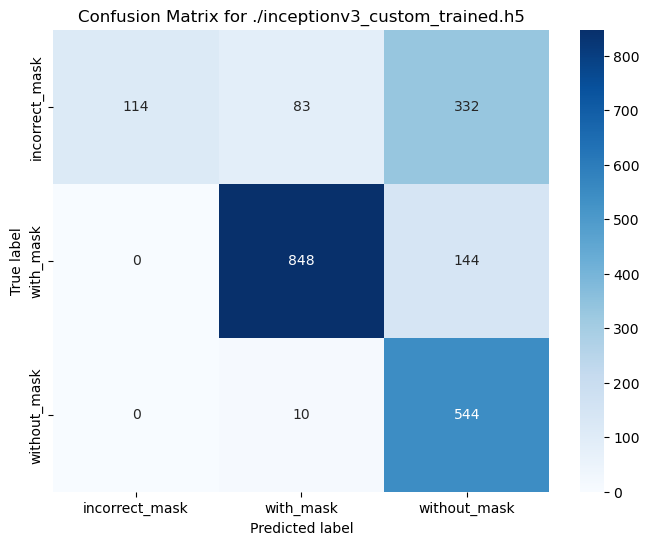

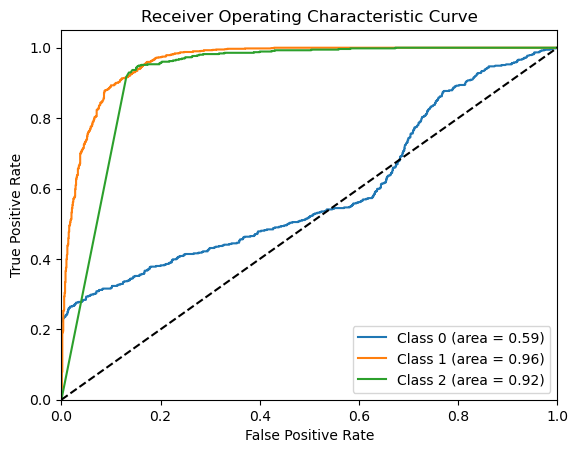

In [2]:
import tensorflow as tf
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

model_paths = [
    './inceptionv3_custom_trained.h5',
]

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    './latest-build',
    target_size=(299, 299),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

for model_path in model_paths:
    print(f"\nEvaluating model: {model_path}")
    
    model = tf.keras.models.load_model(model_path)

    start_time = time.time()
    predictions = model.predict(test_generator, verbose=1)
    end_time = time.time()

    inference_time_per_image = (end_time - start_time) / len(test_generator.filenames)
    print(f"Inference time per image: {inference_time_per_image:.4f} seconds")

    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {model_path}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc

    y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
    n_classes = y_true_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()


Xception Testing

Found 2075 images belonging to 3 classes.

Evaluating model: ./Filtered Model/xception_custom_trained_NEW5.h5
2075/2075 [==============================] - 35s 12ms/step
Inference time per image: 0.0179 seconds

Classification Report:
                precision    recall  f1-score   support

incorrect_mask       0.99      0.43      0.60       529
     with_mask       0.91      0.92      0.92       992
  without_mask       0.65      1.00      0.79       554

      accuracy                           0.82      2075
     macro avg       0.85      0.78      0.77      2075
  weighted avg       0.86      0.82      0.80      2075



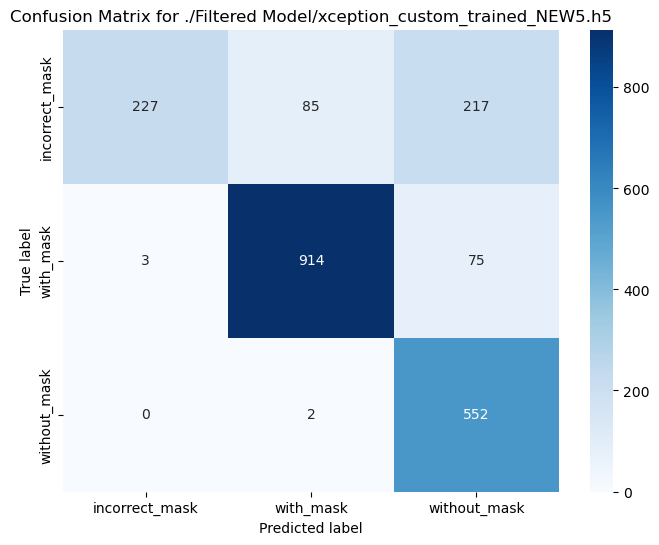

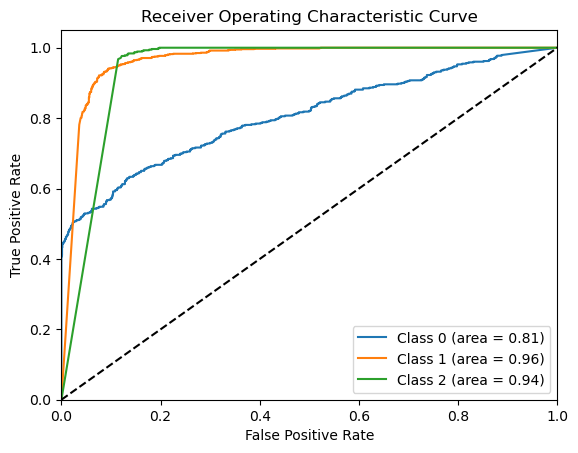

In [11]:
import tensorflow as tf
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

model_paths = [
    './Filtered Model/xception_custom_trained_NEW5.h5'
]

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    './latest-build',
    target_size=(299, 299),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


for model_path in model_paths:
    print(f"\nEvaluating model: {model_path}")
    
    model = tf.keras.models.load_model(model_path)

    start_time = time.time()
    predictions = model.predict(test_generator, verbose=1)
    end_time = time.time()

    inference_time_per_image = (end_time - start_time) / len(test_generator.filenames)
    print(f"Inference time per image: {inference_time_per_image:.4f} seconds")

    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {model_path}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc

    y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
    n_classes = y_true_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()


c:\Users\Shaunak\anaconda3\envs\py310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 4362 images belonging to 3 classes.

Evaluating model: ./train1/xception_intermediate4.h5
4362/4362 [==============================] - 104s 21ms/step
Inference time per image: 0.0245 seconds

Classification Report:
                precision    recall  f1-score   support

incorrect_mask       0.97      0.93      0.95      1500
     with_mask       0.89      0.99      0.94      1437
  without_mask       0.99      0.91      0.95      1425

      accuracy                           0.95      4362
     macro avg       0.95      0.95      0.95      4362
  weighted avg       0.95      0.95      0.95      4362



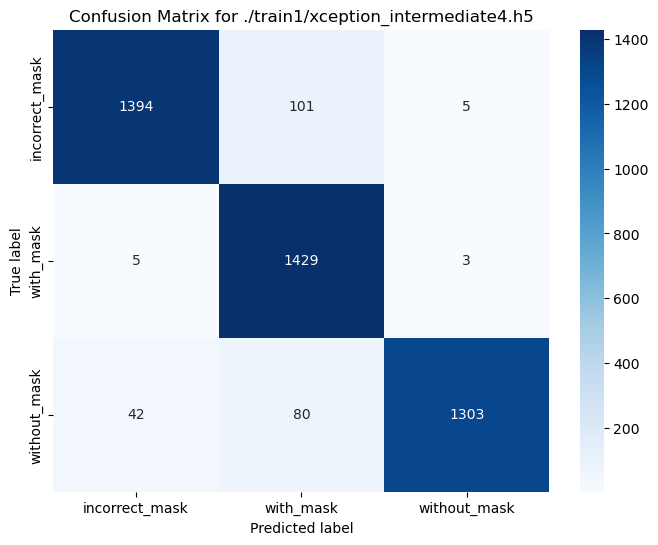

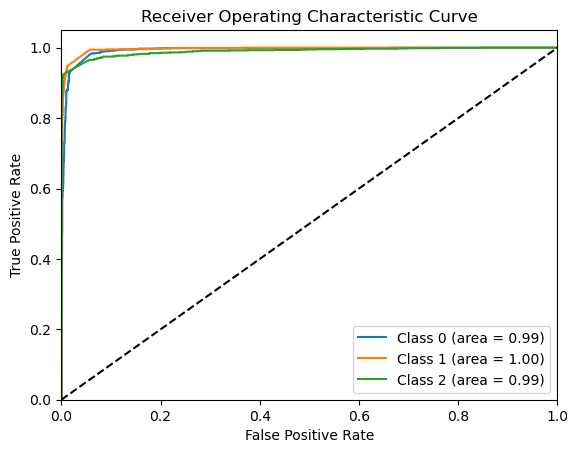

In [1]:
import tensorflow as tf
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

model_paths = [
    './train1/xception_intermediate4.h5'
]

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    './New Data/test/',
    target_size=(299, 299),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


for model_path in model_paths:
    print(f"\nEvaluating model: {model_path}")
    
    model = tf.keras.models.load_model(model_path)

    start_time = time.time()
    predictions = model.predict(test_generator, verbose=1)
    end_time = time.time()

    inference_time_per_image = (end_time - start_time) / len(test_generator.filenames)
    print(f"Inference time per image: {inference_time_per_image:.4f} seconds")

    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {model_path}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc

    y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
    n_classes = y_true_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()


VGG16 TESTING

c:\Users\Shaunak\anaconda3\envs\py310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 2075 images belonging to 3 classes.

Evaluating model: ./vgg16_custom_trained_NEW2.h5
2075/2075 [==============================] - 30s 12ms/step
Inference time per image: 0.0151 seconds

Classification Report:
                precision    recall  f1-score   support

incorrect_mask       0.97      0.68      0.80       529
     with_mask       0.89      0.98      0.93       992
  without_mask       0.84      0.94      0.89       554

      accuracy                           0.89      2075
     macro avg       0.90      0.87      0.87      2075
  weighted avg       0.90      0.89      0.89      2075



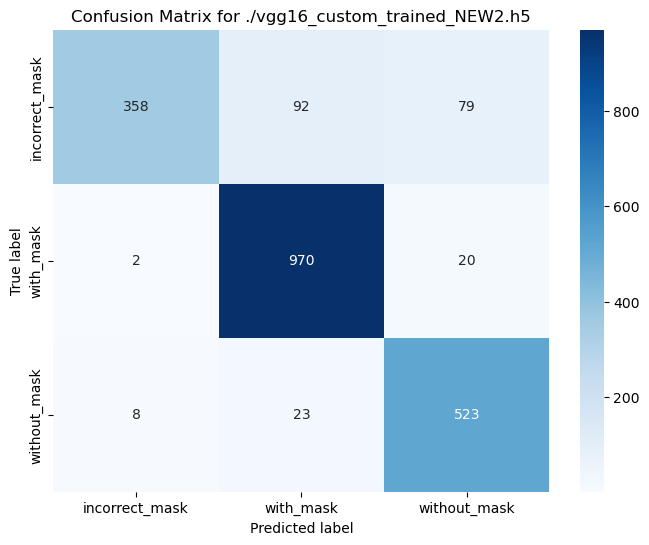

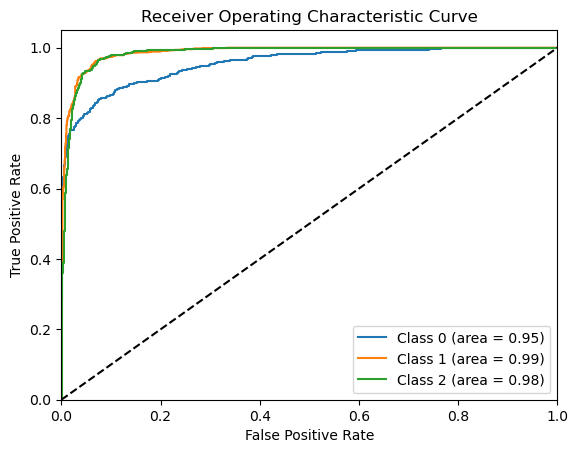

In [1]:
import tensorflow as tf
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

tf.keras.backend.clear_session()

model_paths = [
    './vgg16_custom_trained_NEW2.h5',
    # './Final_models/vgg19_custom_trained.h5'
]

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    './latest-build',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

for model_path in model_paths:
    print(f"\nEvaluating model: {model_path}")
    
    model = tf.keras.models.load_model(model_path)

    start_time = time.time()
    predictions = model.predict(test_generator, verbose=1)
    end_time = time.time()

    inference_time_per_image = (end_time - start_time) / len(test_generator.filenames)
    print(f"Inference time per image: {inference_time_per_image:.4f} seconds")

    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {model_path}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc

    y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
    n_classes = y_true_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()


VGG19 TESTING

Found 2075 images belonging to 3 classes.

Evaluating model: ./vgg19_custom_trained_NEW2.h5
2075/2075 [==============================] - 33s 15ms/step
Inference time per image: 0.0167 seconds

Classification Report:
                precision    recall  f1-score   support

incorrect_mask       0.74      0.87      0.80       529
     with_mask       0.94      0.86      0.90       992
  without_mask       0.90      0.89      0.89       554

      accuracy                           0.87      2075
     macro avg       0.86      0.87      0.86      2075
  weighted avg       0.88      0.87      0.87      2075



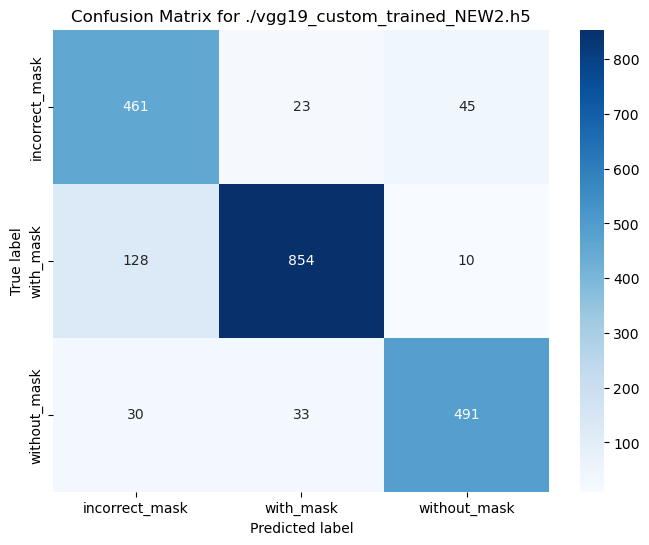

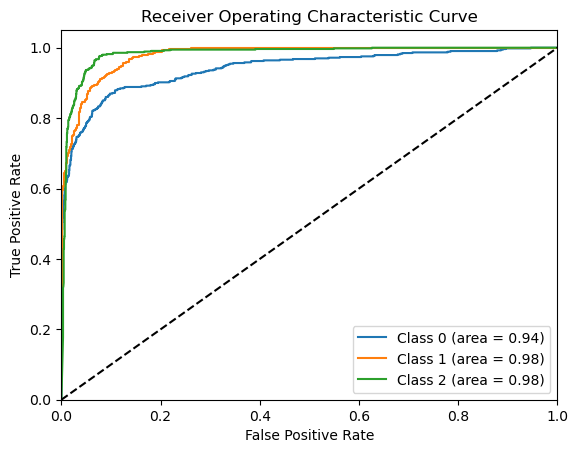

In [7]:
import tensorflow as tf
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

tf.keras.backend.clear_session()

model_paths = [
    # './vgg16_custom_trained_NEW2.h5',
    './vgg19_custom_trained_NEW2.h5'
]

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    './latest-build',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

for model_path in model_paths:
    print(f"\nEvaluating model: {model_path}")
    
    model = tf.keras.models.load_model(model_path)

    start_time = time.time()
    predictions = model.predict(test_generator, verbose=1)
    end_time = time.time()

    inference_time_per_image = (end_time - start_time) / len(test_generator.filenames)
    print(f"Inference time per image: {inference_time_per_image:.4f} seconds")

    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {model_path}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc

    y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
    n_classes = y_true_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()


RESNET TESTING

Found 2075 images belonging to 3 classes.

Evaluating model: ./resnet_custom_trained_NEW4.h5
2075/2075 [==============================] - 29s 14ms/step
Inference time per image: 0.0148 seconds

Classification Report:
                precision    recall  f1-score   support

incorrect_mask       0.98      0.55      0.70       529
     with_mask       0.84      0.97      0.90       992
  without_mask       0.82      0.94      0.88       554

      accuracy                           0.85      2075
     macro avg       0.88      0.82      0.83      2075
  weighted avg       0.87      0.85      0.84      2075



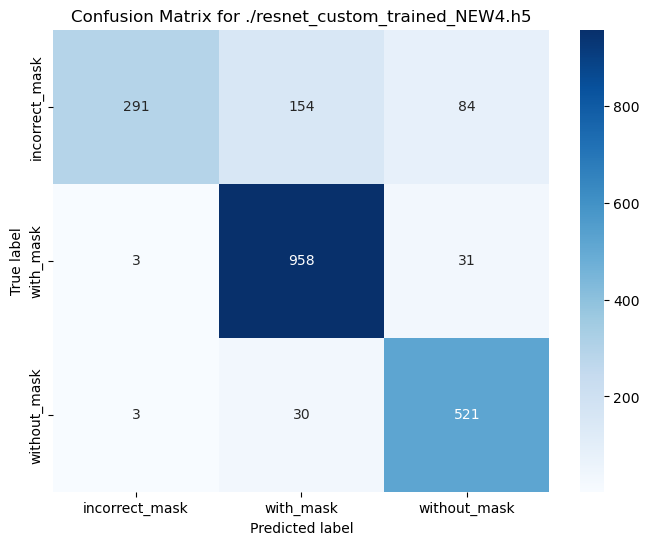

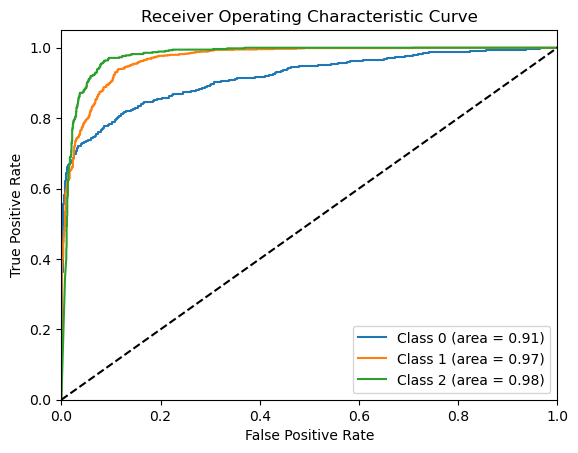

In [4]:
import tensorflow as tf
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

tf.keras.backend.clear_session()

model_paths = [
    './resnet_custom_trained_NEW4.h5',
]

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    './latest-build',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

for model_path in model_paths:
    print(f"\nEvaluating model: {model_path}")
    
    model = tf.keras.models.load_model(model_path)

    start_time = time.time()
    predictions = model.predict(test_generator, verbose=1)
    end_time = time.time()

    inference_time_per_image = (end_time - start_time) / len(test_generator.filenames)
    print(f"Inference time per image: {inference_time_per_image:.4f} seconds")

    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {model_path}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc

    y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
    n_classes = y_true_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()


In [13]:
import tensorflow as tf
print(tf.__version__)


2.10.0


In [ ]:
xception inital train 1 epoch

#11630/11630 [==============================] - 386s 33ms/step - loss: 0.2214 - accuracy: 0.9540 - val_loss: 0.9313 - val_accuracy: 0.8706
# 764/11630 [>.............................] - ETA: 5:17 - loss: 0.1800 - accuracy: 0.9686 11630/11630 [==============================] - 397s 34ms/step - loss: 0.2332 - accuracy: 0.9629 - val_loss: 0.8572 - val_accuracy: 0.8297
# 11630/11630 [==============================] - 384s 33ms/step - loss: 0.1994 - accuracy: 0.9625 - val_loss: 0.8809 - val_accuracy: 0.8441
# 6243/11630 [===============>..............] - ETA: 2:38 - loss: 0.2170 - accuracy: 0.9649 11630/11630 [==============================] - 388s 33ms/step - loss: 0.2017 - accuracy: 0.9637 - val_loss: 1.3844 - val_accuracy: 0.8713
# 11630/11630 [==============================] - 382s 33ms/step - loss: 0.1959 - accuracy: 0.9578 - val_loss: 0.9291 - val_accuracy: 0.8957
#11630/11630 [==============================] - 398s 34ms/step - loss: 0.1751 - accuracy: 0.9649 - val_loss: 1.8377 - val_accuracy: 0.8778
#11630/11630 [==============================] - 433s 37ms/step - loss: 0.2280 - accuracy: 0.9625 - val_loss: 1.7601 - val_accuracy: 0.8111
#11630/11630 [==============================] - 408s 35ms/step - loss: 0.1844 - accuracy: 0.9642 - val_loss: 1.9091 - val_accuracy: 0.8744


finetune
# 4765/11630 [===========>..................] - ETA: 6:21 - loss: 0.6722 - accuracy: 0.8753 11630/11630 [==============================] - 703s 60ms/step - loss: 0.3507 - accuracy: 0.9280 - val_loss: 4.3622 - val_accuracy: 0.7980
# 11630/11630 [==============================] - 705s 60ms/step - loss: 0.0676 - accuracy: 0.9813 - val_loss: 3.6241 - val_accuracy: 0.8152
#  6718/11630 [================>.............] - ETA: 4:41 - loss: 0.0433 - accuracy: 0.9872 11630/11630 [==============================] - 713s 61ms/step - loss: 0.0409 - accuracy: 0.9881 - val_loss: 2.0586 - val_accuracy: 0.8248
# 11630/11630 [==============================] - 702s 60ms/step - loss: 0.0307 - accuracy: 0.9894 - val_loss: 1.6618 - val_accuracy: 0.8462
#  9499/11630 [=======================>......] - ETA: 2:01 - loss: 0.0227 - accuracy: 0.9921 11630/11630 [==============================] - 710s 60ms/step - loss: 0.0224 - accuracy: 0.9923 - val_loss: 1.5692 - val_accuracy: 0.8806
# 11630/11630 [==============================] - 700s 60ms/step - loss: 0.0202 - accuracy: 0.9935 - val_loss: 2.3989 - val_accuracy: 0.8620
# 11630/11630 [==============================] - 710s 61ms/step - loss: 0.0176 - accuracy: 0.9948 - val_loss: 1.3659 - val_accuracy: 0.9016
11630/11630 [==============================] - 702s 60ms/step - loss: 0.0183 - accuracy: 0.9939 - val_loss: 1.0554 - val_accuracy: 0.9057
11630/11630 [==============================] - 814s 69ms/step - loss: 0.0174 - accuracy: 0.9955 - val_loss: 1.2537 - val_accuracy: 0.8892
11630/11630 [==============================] - 719s 61ms/step - loss: 0.0129 - accuracy: 0.9960 - val_loss: 2.1362 - val_accuracy: 0.8761


FINTUNE3_1
11630/11630 [==============================] - 680s 58ms/step - loss: 0.1664 - accuracy: 0.9461 - val_loss: 1.9269 - val_accuracy: 0.8252
